In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

class_names=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']


In [ ]:
#Create, train and save model

(training_images,training_labels),(testing_images,testing_labels) = datasets.cifar10.load_data()
training_images,testing_images = training_images/255,testing_images/255

training_images =  training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images,training_labels, epochs=10,validation_data=(testing_images,testing_labels))

loss,accuracy = model.evaluate(testing_images,testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save('image_classifier.model')


1/1 [==============================] - 0s 58ms/step
Prediction is Horse

0.0% to be Plane
0.0% to be Car
0.09% to be Bird
0.02% to be Cat
4.52% to be Deer
0.04% to be Dog
0.11% to be Frog
95.21% to be Horse
0.0% to be Ship
0.0% to be Truck


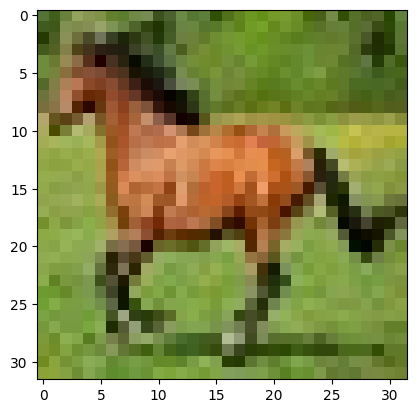

In [18]:
#Load saved model and use it to predict

model = models.load_model("image_classifier.model")

img=cv.imread('horse.jpg') #predicted image
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img,cmap=plt.cm.binary)

prediction = model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}\n')

count=0
for animal in class_names:
    print('{0}% to be {1}'.format(round(prediction[0][count]*100,2), animal))
    count+=1
